# ¡Hola Elias! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Elias has realizado un gran trabajo en el desarrollo de este proyecto, desde la meticulosa preparación inicial de los datos hasta la validación final de hipótesis mediante pruebas estadísticas rigurosas. La limpieza efectiva de datos, incluyendo la identificación de duplicados, estableció una base sólida para tu análisis del embudo de conversión, donde identificaste con precisión los puntos críticos de abandono de usuarios. Tu aplicación adecuada de pruebas estadísticas demuestra un dominio sólido de la inferencia estadística, mientras que tus visualizaciones comunican efectivamente los hallazgos clave. Aunque el trabajo es sobresaliente, podría elevarse aún más mediante la implementación de técnicas de corrección para comparaciones múltiples (como Bonferroni o Benjamini-Hochberg) y la inclusión de visualizaciones adicionales como curvas de conversión del embudo. La combinación de tu rigor analítico con la capacidad para extraer conclusiones accionables para el negocio demuestra tu potencial como analista de datos.
    
Te deseo éxitos en tu próximo Sprint 🚀
    
*Estado del Proyecto*: **Aprobado**

</div>

---

Descripción de los datos

Cada entrada de registro es una acción de usuario o un evento.

    EventName: nombre del evento.
    DeviceIDHash: identificador de usuario unívoco.
    EventTimestamp: hora del evento.
    ExpId: número de experimento. 246 y 247 son los grupos de control, y 248 es el grupo de prueba.

Instrucciones para completar el proyecto

Paso 1. Abrir el archivo de datos y leer la información general

Ruta de archivo: */datasets/logs_exp_us.csv* 


In [1]:
# se importan las librerias necesarias para el analisis de datos
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import scipy.stats as stats
from matplotlib import pyplot as plt


def looks(datos):
    """Genera un análisis de todo el set de datos de manera global"""

    print("Se ejecuta la descripción de los datos:")
    print(datos.describe(include="all"))
    print()
    print("se hace exploración con método info:")
    print(datos.info())
    print()
    print("se hace una observación con el método Sample:")
    if len(datos) > 10:
        print(datos.sample(10))
    else:
        print(datos)
    print()
    print("hay NA?:")
    print(datos.isna().sum())
    print()
    print("Duplicados:")
    print(datos.duplicated().sum())

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Elias gran idea usar una función propia para hacer un análisis exploratorios. Las funciones `info` y `describe` nos permitirán tener una visión clara del contenido y estructura del dataset. Adicionalmente, hiciste una comprobación de datos faltantes y duplicados.

</div>

In [2]:
data = pd.read_csv('/datasets/logs_exp_us.csv' , sep='\t')
looks(data)

Se ejecuta la descripción de los datos:
               EventName  DeviceIDHash  EventTimestamp          ExpId
count             244126  2.441260e+05    2.441260e+05  244126.000000
unique                 5           NaN             NaN            NaN
top     MainScreenAppear           NaN             NaN            NaN
freq              119205           NaN             NaN            NaN
mean                 NaN  4.627568e+18    1.564914e+09     247.022296
std                  NaN  2.642425e+18    1.771343e+05       0.824434
min                  NaN  6.888747e+15    1.564030e+09     246.000000
25%                  NaN  2.372212e+18    1.564757e+09     246.000000
50%                  NaN  4.623192e+18    1.564919e+09     247.000000
75%                  NaN  6.932517e+18    1.565075e+09     248.000000
max                  NaN  9.222603e+18    1.565213e+09     248.000000

se hace exploración con método info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data

In [3]:
#Se exploran los duplicados para ver si hay duplicados reales, Se determina que no, solo son distintos eventos para el mismo dispositivo, o el mismo evento para distintos dispositivos
print(data[data.duplicated()].sort_values('DeviceIDHash').head(15))

                      EventName        DeviceIDHash  EventTimestamp  ExpId
130558         MainScreenAppear   33176906322804559      1564933075    248
130995       OffersScreenAppear   33176906322804559      1564933763    248
104108         CartScreenAppear   34565258828294726      1564857221    248
159302  PaymentScreenSuccessful   54903596035630984      1565011672    248
176813  PaymentScreenSuccessful   77364241990273403      1565044732    246
189896         MainScreenAppear   91292479590032512      1565087723    246
155464         MainScreenAppear   95206628315371849      1565005724    247
110479         MainScreenAppear  170935625628929269      1564897487    246
34223          CartScreenAppear  197027893265565660      1564684544    246
17037          CartScreenAppear  197027893265565660      1564659614    246
112562         CartScreenAppear  197027893265565660      1564902904    246
144045         CartScreenAppear  197027893265565660      1564983860    246
23421          CartScreen


Paso 2. Preparar los datos para el análisis

    Cambia el nombre de las columnas de manera que sea conveniente para ti.
    Comprueba los tipos de datos y valores ausentes. Corrige los datos si es necesario.
    Agrega una columna de fecha y hora y una columna separada para las fechas.

In [4]:
data['daytime'] = data['EventTimestamp'].apply(lambda x: dt.datetime.fromtimestamp(x))
data['date'] = data['daytime'].dt.date
data

,EventName,DeviceIDHash,EventTimestamp,ExpId,daytime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Aunque la creaste de forma correcta la columna *date*, usar una función anonima no es tan eficiente. Para este tipo de transformaciones es más conveniendo usar la función `pd.to_datetime` 

</div>



Paso 3. Estudiar y comprobar los datos

  -  ¿Cuántos eventos hay en los registros?
  -  ¿Cuántos usuarios hay en los registros?
  -  ¿Cuál es el promedio de eventos por usuario?
  -  ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?
  -  ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
  -  Asegúrate de tener usuarios de los tres grupos experimentales.


In [5]:
# ¿Cuántos eventos hay en los registros?
print('Nombres de los eventos:')
for event in data['EventName'].unique(): print(event)
print()
print('Número de eventos:',len(data['EventName'].unique()))

Nombres de los eventos:
MainScreenAppear
PaymentScreenSuccessful
CartScreenAppear
OffersScreenAppear
Tutorial

Número de eventos: 5


In [6]:
# ¿Cuántos usuarios hay en los registros?

print('Número de Usuarios:', len(data['DeviceIDHash'].unique()))

Número de Usuarios: 7551


In [7]:
# ¿Cuál es el promedio de eventos por usuario?


print(f"El promedio de eventos por usuario es de: {data.groupby('DeviceIDHash')['EventName'].count().mean():.2f} eventos")

El promedio de eventos por usuario es de: 32.33 eventos


Fecha mínima: 2019-07-25 04:43:36
Fecha máxima: 2019-08-07 21:15:17


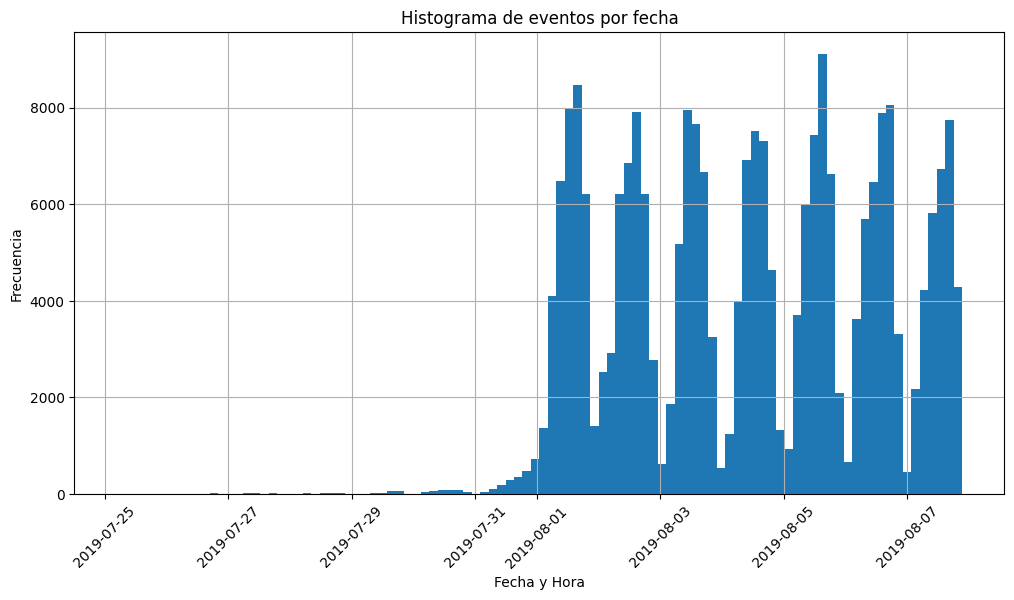

In [8]:
 # ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. 
print(f"Fecha mínima: {data['daytime'].min()}")
print(f"Fecha máxima: {data['daytime'].max()}")

# Traza un histograma por fecha y hora
plt.figure(figsize=(12, 6))
data['daytime'].hist(bins=100)
plt.xlabel('Fecha y Hora')
plt.ylabel('Frecuencia')
plt.title('Histograma de eventos por fecha')
plt.xticks(rotation=45)
plt.show()

In [9]:
 # ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. 
 # Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. 
data_f = data[data['date'] > pd.to_datetime('2019-08-01').date()]
 # ¿Qué periodo representan realmente los datos?
print('Se observa que los datos son mas consistentes y parecen estar mas completos apartir del primero de agosto')
print()
print(data_f.head())


Se observa que los datos son mas consistentes y parecen estar mas completos apartir del primero de agosto

                     EventName         DeviceIDHash  EventTimestamp  ExpId  \
39057         CartScreenAppear  6304868067479728361      1564704000    248   
39058         MainScreenAppear  6077372516405234625      1564704008    246   
39059  PaymentScreenSuccessful  6304868067479728361      1564704018    248   
39060         CartScreenAppear  6304868067479728361      1564704019    248   
39061  PaymentScreenSuccessful  6304868067479728361      1564704032    248   

                  daytime        date  
39057 2019-08-02 00:00:00  2019-08-02  
39058 2019-08-02 00:00:08  2019-08-02  
39059 2019-08-02 00:00:18  2019-08-02  
39060 2019-08-02 00:00:19  2019-08-02  
39061 2019-08-02 00:00:32  2019-08-02  


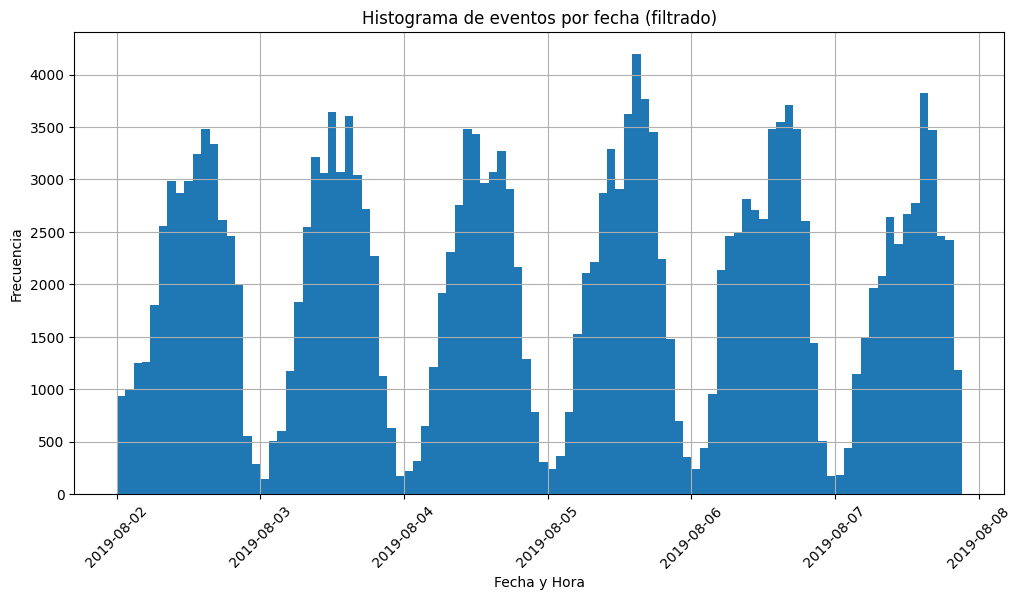

In [10]:
# Traza un histograma por fecha y hora
plt.figure(figsize=(12, 6))
data_f['daytime'].hist(bins=100)
plt.xlabel('Fecha y Hora')
plt.ylabel('Frecuencia')
plt.title('Histograma de eventos por fecha (filtrado)')
plt.xticks(rotation=45)
plt.show()

In [32]:
data["ExpId"].value_counts()

248    85747
246    80304
247    78075
Name: ExpId, dtype: int64

Se observa que hay una tendencia a utilizar la app en aproximadamente la misma hora del dia

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Has demostrado una notable capacidad analítica en tu exploración de datos. La cuantificación sistemática de eventos y usuarios proporciona una base sólida para comprender la magnitud y el alcance del conjunto de datos.
    
La implementación de estadísticas descriptivas refleja un enfoque riguroso, mientras que la representación visual a través del histograma demuestra tu habilidad para transformar datos numéricos en insights comprensibles. Esta combinación de análisis cuantitativo y visual resulta particularmente efectiva para identificar tendencias y patrones subyacentes en los datos.
    
Tu decisión estratégica de excluir registros históricos más antiguos es una decisión acertada, ya que demuestra una comprensión de la importancia de trabajar con datos representativos y evitar distorsiones que podrían comprometer la validez del análisis.

</div>


Paso 4. Estudiar el embudo de eventos

    Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.
    Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.
    ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.
    Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.
    ¿En qué etapa pierdes más usuarios?
    ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?


In [11]:
#  Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.
data_f.groupby('EventName')['daytime'].agg('count').sort_values()

EventName
Tutorial                     791
PaymentScreenSuccessful    29311
CartScreenAppear           36134
OffersScreenAppear         39359
MainScreenAppear           99474
Name: daytime, dtype: int64

Se observa que el evento mas frecuente es ver la pantalla principal, por el contrario casi ningun usuario realizo el tutorial 

In [12]:
#Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios.
eventByUser = data_f.groupby('EventName')['DeviceIDHash'].nunique().sort_values(ascending= False)
# Calcula la proporción de usuarios que realizaron la acción al menos una vez.
n_usuarios = data_f['DeviceIDHash'].nunique()

print('El numero de eventos por usuario es:')
print(eventByUser)
print()
print('la proporcion es:')
print(eventByUser/n_usuarios)


El numero de eventos por usuario es:
EventName
MainScreenAppear           7156
OffersScreenAppear         4380
CartScreenAppear           3571
PaymentScreenSuccessful    3399
Tutorial                    690
Name: DeviceIDHash, dtype: int64

la proporcion es:
EventName
MainScreenAppear           0.982158
OffersScreenAppear         0.601153
CartScreenAppear           0.490118
PaymentScreenSuccessful    0.466511
Tutorial                   0.094702
Name: DeviceIDHash, dtype: float64


Se observa que menos de la mitad de usuarios que abren la aplicacion concretan la compra 

In [13]:
# definimos una funcion para uso posterior 

def funnl_ord(data, funnel):
    """ Se genera una funcion para establecer el orden de eventos. 
    Se toman dos argumentos; el origen de los datos y el funnel ordenado de los eventos"""

    funn_eve = pd.DataFrame(columns=['event', 'unique_users', 'proportion'])

    for i in range(len(funnel) - 1):
        current_event = funnel[i]
        next_event = funnel[i + 1]

        current_users = data[data['EventName'] == current_event]['DeviceIDHash'].unique()
        next_users = data[data['EventName'] == next_event]['DeviceIDHash'].unique()

        proportion = len(set(next_users) & set(current_users)) / len(current_users)

        new_row = pd.DataFrame({'event': [next_event], 'unique_users': [len(next_users)], 'proportion': [proportion]})
        funn_eve = pd.concat([funn_eve, new_row], ignore_index=True)
    print(funn_eve)

In [14]:
#¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.
#Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.
#¿En qué etapa pierdes más usuarios?

#Debido a que los usuarios parecen omitir el tutorial no se considera para el embudo de eventos 
#se genera embudo
funnel = ['MainScreenAppear','OffersScreenAppear','CartScreenAppear','PaymentScreenSuccessful']

funnl_ord(data_f,funnel)


                     event unique_users  proportion
0       OffersScreenAppear         4380    0.594466
1         CartScreenAppear         3571    0.803881
2  PaymentScreenSuccessful         3399    0.950434


Se observa que poco mas de la mitad de usuarios que abren la apliacion pasan a la pantalla de oferta pero el 80% de esos agregan el prducto a su carrito y casi el 100% de los usuarios con producto en el carrito realizan la compra 

In [15]:
#  ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?
def user_full_trip(data, funnel, show=True):
    """ Se genera una funcion para dar el porcentaje de usuarios que recorren el funnel completo
    desde el inicio hasta el final"""

    # Encuentra los usuarios que realizaron el primer evento
    first_event_users = data[data['EventName'] == funnel[0]]['DeviceIDHash'].unique()
    # Encuentra los usuarios que realizaron el último evento (pago)
    last_event_users = data[data['EventName'] == funnel[-1]]['DeviceIDHash'].unique()
    # Calcula el porcentaje de usuarios que realizaron todo el viaje
    percentage_full_journey = len(set(last_event_users) & set(first_event_users)) / len(first_event_users) * 100
    
    if show:
        print(f"El porcentaje de usuarios que hace todo el viaje desde su primer evento hasta el pago es: {percentage_full_journey:.2f}%")
    else:
        return percentage_full_journey


user_full_trip(data_f,funnel)

El porcentaje de usuarios que hace todo el viaje desde su primer evento hasta el pago es: 45.99%


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu análisis del embudo de conversión demuestra una comprensión de cómo los usuarios interactúan con el sistema. Has logrado mapear de manera efectiva el recorrido del usuario, identificando con precisión los momentos críticos donde ocurren las transiciones entre las diferentes etapas del proceso.
    
La metodología que has empleado para calcular las tasas de conversión resulta particularmente valiosa. Al examinar la proporción de usuarios que avanzan de una fase a otra, has podido cuantificar con exactitud la eficiencia de cada etapa del embudo. Este enfoque sistemático ha revelado un descubrimiento significativo: existe una caída notable en la tasa de conversión durante la transición de la pantalla principal a la sección de ofertas. Esta observación merece especial atención, ya que representa una oportunidad tangible para mejorar la experiencia del usuario.
    
Para profundizar aún más en tu análisis, podrías considerar incorporar dimensiones adicionales que enriquezcan tu comprensión del comportamiento del usuario. Por ejemplo, el análisis de los tiempos de permanencia en cada pantalla podría revelar si los usuarios encuentran dificultades en momentos específicos del proceso. Asimismo, la segmentación de usuarios permitiría identificar si ciertos grupos experimentan mayores desafíos que otros durante su recorrido por el embudo.
    
</div>


Paso 5. Estudiar los resultados del experimento

   - ¿Cuántos usuarios hay en cada grupo?
   - Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.
   - Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?
   - Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?
   - ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

In [16]:
usuarios_por_grupo = data_f.pivot_table(
    index='ExpId', values='DeviceIDHash', aggfunc='nunique')

usuarios_por_grupo

,DeviceIDHash
ExpId,
246,2393
247,2434
248,2459


In [17]:
gpo_246 = data_f[data_f['ExpId'] == 246]['DeviceIDHash'].unique()
gpo_247 = data_f[data_f['ExpId'] == 247]['DeviceIDHash'].unique()

In [18]:
t_stat, p_value = stats.ttest_ind(gpo_246, gpo_247, equal_var=False)
print(f"Estadístico t: {t_stat:.4f}, Valor p: {p_value:.4f}")

Estadístico t: 0.5260, Valor p: 0.5989


Se observa que la significancia estadistica es muy alta por lo tanto las diferencias no existen entre los grupos. Esto es algo esperado ya que ambas muestras son del grupo control.


In [19]:
#ver evento mas popular
data_f.pivot_table(index='EventName', columns='ExpId', aggfunc='nunique', values='DeviceIDHash')

ExpId,246,247,248
EventName,,,
CartScreenAppear,1213,1184,1174
MainScreenAppear,2355,2392,2409
OffersScreenAppear,1480,1438,1462
PaymentScreenSuccessful,1152,1118,1129
Tutorial,230,227,233


Se encuentra que el evento mas popular es la presenciation de la pantalla principal

In [20]:
# Se genera una funcion para el calulo de proporciones (se experimenta con PEP 3107)
def u_per_ev_gpo(data: pd.DataFrame, gpo: int, evento: str) -> None:
    """Se genera funcion para calcular la proporcion del evento"""
    u_eve = data[(data['ExpId'] == gpo) & (data['EventName'] == evento)]['DeviceIDHash'].nunique()
    u_gpo = data[data['ExpId'] == gpo]['DeviceIDHash'].nunique()

    Prop = u_eve / u_gpo
    print(f'La proporcion de usuarios del grupo {gpo}, que realizaron el evento es: {Prop:.2%}')

In [21]:
for gpo in [246, 247, 248]:
    u_per_ev_gpo(data_f, gpo, 'MainScreenAppear')


La proporcion de usuarios del grupo 246, que realizaron el evento es: 98.41%
La proporcion de usuarios del grupo 247, que realizaron el evento es: 98.27%
La proporcion de usuarios del grupo 248, que realizaron el evento es: 97.97%


In [22]:
def t_dif_gpo(gpo1: pd.DataFrame, gpo2: pd.DataFrame, P: float=0.05) -> None:
    t_stat_evento, p_value_evento = stats.ttest_ind(
        gpo1, gpo2, equal_var=False)
    print('El resultado de la prueba es:')
    print(f"Estadístico t: {t_stat_evento:.4F}, Valor p: {p_value_evento:.4F}")

    if p_value_evento < P:
        print("Existen diferencias significativas.")
    else:
        print("No hay diferencias significativas.")


In [23]:
gpo_246 = data[(data['ExpId'] == 246) & (data['EventName'] == 'MainScreenAppear')]['DeviceIDHash'].value_counts()
gpo_247 = data[(data['ExpId'] == 247) & (data['EventName'] == 'MainScreenAppear')]['DeviceIDHash'].value_counts()
gpo_248 = data[(data['ExpId'] == 248) & (data['EventName'] == 'MainScreenAppear')]['DeviceIDHash'].value_counts()
gpo_ctrl = data[(data['ExpId'] != 248) & (data['EventName'] == 'MainScreenAppear')]['DeviceIDHash'].value_counts()

In [24]:
t_dif_gpo(gpo_246,gpo_247)
print('No hay diferencia entre los grupos control, cosa que se espera :)')


El resultado de la prueba es:
Estadístico t: -0.8934, Valor p: 0.3717
No hay diferencias significativas.
No hay diferencia entre los grupos control, cosa que se espera :)


In [25]:
t_dif_gpo(gpo_ctrl,gpo_248)
print('No hay diferencia entre los grupos control y experimental \nEsto denota que nuestro experimento no tuvo efectividad')

El resultado de la prueba es:
Estadístico t: -1.7090, Valor p: 0.0875
No hay diferencias significativas.
No hay diferencia entre los grupos control y experimental 
Esto denota que nuestro experimento no tuvo efectividad


In [26]:
#Se repiten los analisis con la nueva p sugerida

t_dif_gpo(gpo_246,gpo_247,0.1)


El resultado de la prueba es:
Estadístico t: -0.8934, Valor p: 0.3717
No hay diferencias significativas.


In [27]:
t_dif_gpo(gpo_ctrl, gpo_248,0.1)

El resultado de la prueba es:
Estadístico t: -1.7090, Valor p: 0.0875
Existen diferencias significativas.


Se observa que los resultados de la prueba ya son significativos al ajustar la significancia, sin embargo; el aumentar la significancia para hacer que los datos se amolden a la hipotesis es una tecnica que no debe ser realizada, ya que la significancia debe establecerce a priori para garantizar la confiabilidad de las pruebas A/B.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Elias tu trabajo demuestra un sólido entendimiento de los conceptos estadísticos y de programación aplicados al análisis de experimentos A/B.  Realizaste un análisis estadístico adecuado, utilizando correctamente pruebas de hipótesis con el estadístico t y el valor p para comparar grupos, y interpretaste los resultados de manera clara y coherente con lo esperado en un experimento A/A. Identificaste el evento más popular (MainScreenAppear) y analizaste las proporciones de usuarios que lo realizaron en cada grupo, lo cual es fundamental para entender el comportamiento de los usuarios. También reconociste la importancia de establecer un nivel de significancia a priori y discutiste las implicaciones de ajustarlo después de ver los resultados, evitando prácticas como el "p-hacking" y asegurando la validez de las conclusiones.
    
<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Seería útil validar los supuestos estadísticos detrás de las pruebas t, como la normalidad de las distribuciones y la homogeneidad de varianzas, utilizando pruebas adicionales (por ejemplo, Shapiro-Wilk). Además, seria interesante calcular intervalos de confianza para las proporciones, lo que proporcionaría un rango de valores plausibles y una mejor comprensión de la precisión de las estimaciones. Asismismo, puedes abordar el problema de las comparaciones múltiples aplicando correcciones como el método de Bonferroni o el control de la tasa de descubrimiento falso (FDR) para ajustar los valores p y reducir el riesgo de falsos positivo. Finalmente puedes complementar la presentación de los resultados utilizando visualizaciones gráficas, como diagramada de barras para las proporciones o diagramas de caja para las distribuciones, lo que facilitaría la interpretación.
    

</div>
</div>